In [25]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib.pyplot import figure
attributesInput = pd.read_csv('../Dataset/AttributesF.csv')
emailDataInput = pd.read_csv('../Dataset/FinalEdata.csv')
conflictsInput = pd.read_csv('../Dataset/TC2.csv')

C:\Users\곰단\AppData\Local\Temp\ipykernel_5272\2752860207.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  emailDataInput = pd.read_csv('../Dataset/FinalEdata.csv')


In [26]:
attributes = attributesInput
print(attributes)

      ID  Gender   Age  Department  Tenure_Full  Supervisor_T1  \
0      1     1.0  27.0         9.0       44.167           14.0   
1      2     0.0  35.0         9.0      178.533            NaN   
2      3     0.0  29.0         8.0       38.833          150.0   
3      4     0.0  29.0         9.0       99.900           69.0   
4      5     0.0  43.0         1.0      125.967           47.0   
..   ...     ...   ...         ...          ...            ...   
209  210     0.0  26.0         9.0        8.667            NaN   
210  211     0.0  35.0         9.0        7.533            NaN   
211  212     0.0  26.0         9.0       12.100            NaN   
212  213     NaN   NaN         NaN          NaN            NaN   
213  214     0.0   NaN         NaN          NaN            NaN   

     Hierarchical Level  
0                   1.0  
1                   1.0  
2                   2.0  
3                   1.0  
4                   1.0  
..                  ...  
209                 1.0  

In [27]:
conflicts = conflictsInput.set_index(['Source'])
conflicts = conflicts.stack().to_frame()
conflicts = conflicts.rename_axis(['sjt', 'ojt']).reset_index()
conflicts = conflicts.rename(columns={0: 'type'}) 
conflicts = conflicts.astype({'type': 'int16'})
conflicts = conflicts.astype({'ojt': 'int32'})

print(conflicts)

      sjt  ojt  type
0       1   14     2
1       1   33     2
2       1  120     1
3       1  155     3
4       2   10     3
...   ...  ...   ...
3581  171   97     2
3582  171  111     2
3583  172   14     3
3584  172   24     3
3585  172  113     3

[3586 rows x 3 columns]


In [28]:
conflicts = conflicts.merge(attributesInput, how='left', left_on='sjt', right_on='ID')

In [29]:
conflicts = conflicts.drop(columns=['ID', 'Gender', 'Age', 'Tenure_Full', 'Supervisor_T1', 'Hierarchical Level'])
conflicts = conflicts.rename(columns={'Department': 'dep_sjt'})

In [30]:
conflicts = conflicts.merge(attributesInput, how='left', left_on='ojt', right_on='ID')
conflicts = conflicts.drop(columns=['ID', 'Gender', 'Age', 'Tenure_Full', 'Supervisor_T1', 'Hierarchical Level'])
conflicts = conflicts.rename(columns={'Department': 'dep_ojt'})
conflicts = conflicts.astype({'dep_sjt': 'int16', 'dep_ojt': 'int16'})
conflicts = conflicts.loc[conflicts['type'] == 1]
print(conflicts)

      sjt  ojt  type  dep_sjt  dep_ojt
2       1  120     1        9        9
5       2   28     1        9        8
7       2   33     1        9        5
10      2   77     1        9        9
12      2  107     1        9        8
...   ...  ...   ...      ...      ...
3552  170   70     1       12        8
3559  170   96     1       12       11
3573  170  171     1       12       10
3574  171   18     1       10       11
3579  171   46     1       10        6

[415 rows x 5 columns]


In [31]:
#illustrates the target department; computes same graphs with slight differences in node position every trials
target_dept = 2
dept = conflicts.loc[ ((conflicts['dep_sjt'] == target_dept) | (conflicts['dep_ojt'] == target_dept)) ]

In [32]:
G = nx.from_pandas_edgelist(dept, 'sjt', 'ojt', create_using=nx.MultiDiGraph)
colors = []
for node in G:
    if attributes.loc[node-1, 'Department'] == target_dept:
        colors.append('red')
    else:
        colors.append('lightblue')

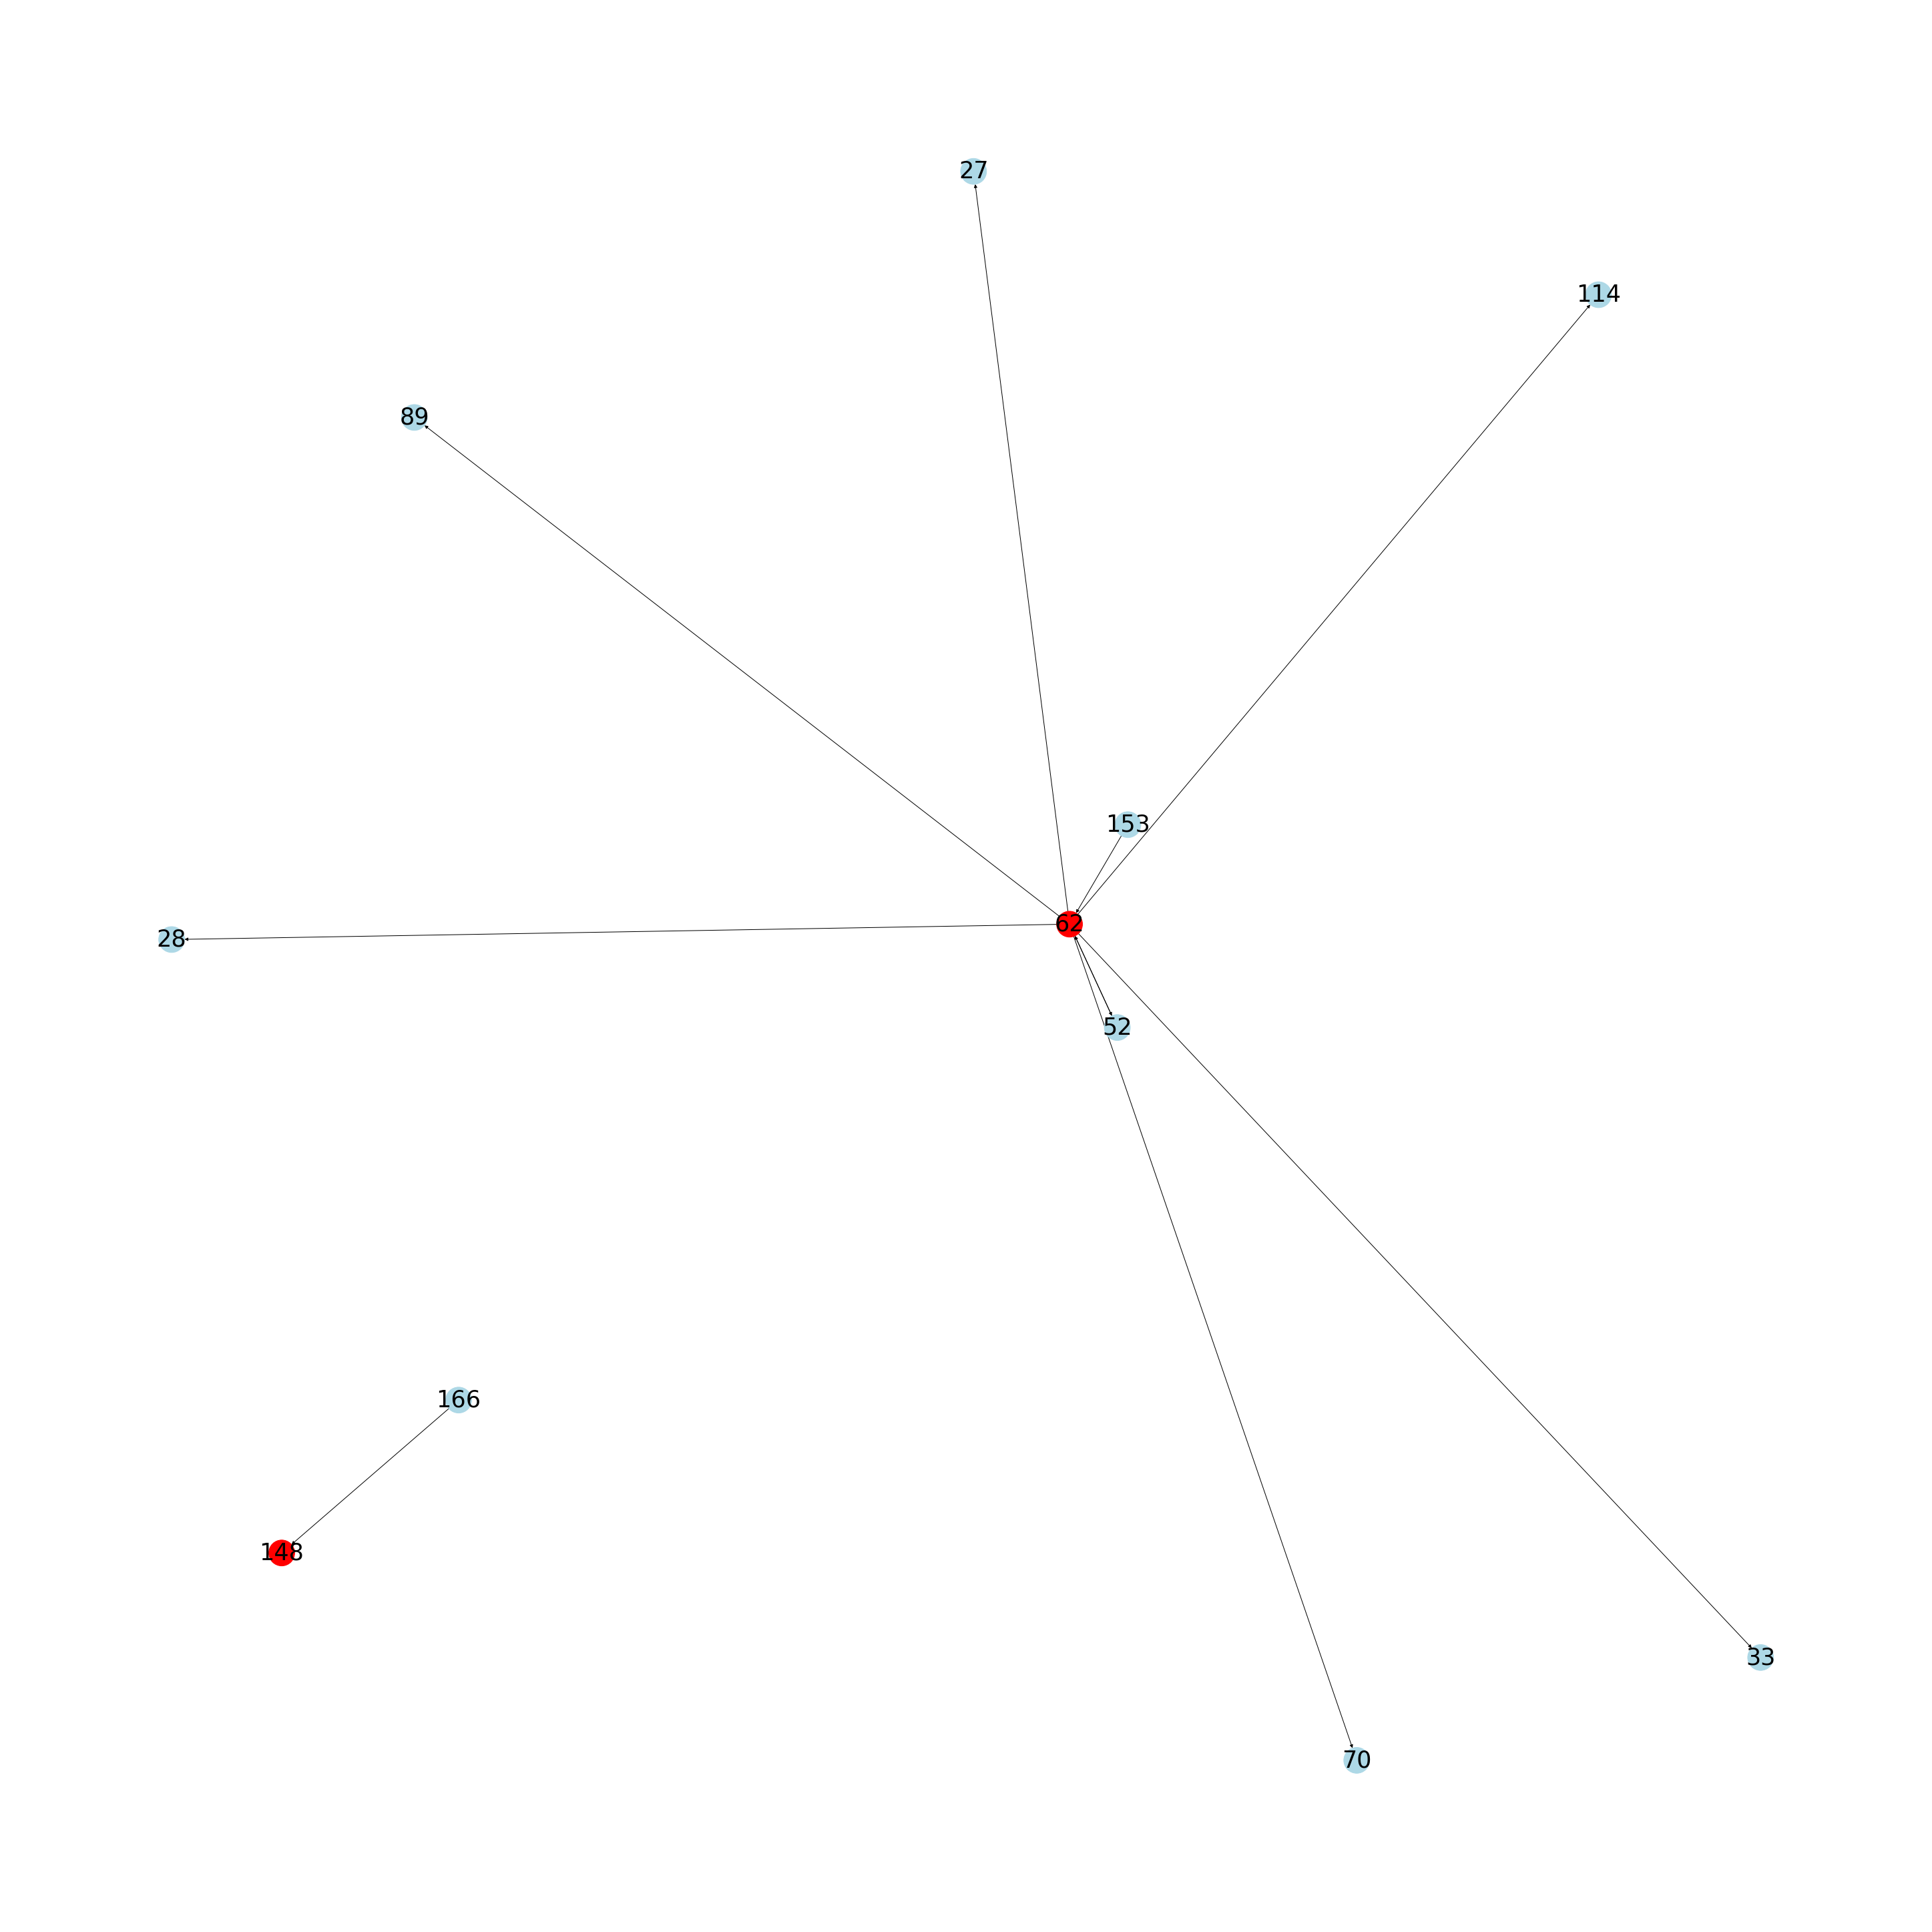

In [33]:
figure(figsize=(40, 40))
nx.draw_spring(G, with_labels=True, node_color=colors, node_size=1500, font_size=35)